# Машинное обучение

# Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

'Churn' — факт оттока в текущем месяце.

## Загрузка данных 

In [1]:
def pre(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns] #привожу названия столбцов к хорошему стилю
    #display(df.head())
    display(df.info())
    display(df.describe())
    dup = df.duplicated().sum()
    print('Количество полных дубликатов:', dup)
    return  

In [2]:
import pandas as pd
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 300
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.1f}'.format)
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import itertools

In [3]:
df = pd.read_csv('')
df.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                          14.2                    5.0   
1             1   31                         113.2                   12.0   
2             0   28                         129.4                    1.0   
3             1   33                          62.7                   12.0   
4             0   26                         198.4                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                        0.0                                0.0   
1         7                        1.9                                1.9   
2         2                        1.9                                1.7   
3         2                        3.2                                3.4   
4         3                        1.1                                1.1   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

## Исследовательский анализ данных (EDA)

In [4]:
pre(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

None

gender  near_location  partner  promo_friends   phone  contract_period  \
count 4,000.0        4,000.0  4,000.0        4,000.0 4,000.0          4,000.0   
mean      0.5            0.8      0.5            0.3     0.9              4.7   
std       0.5            0.4      0.5            0.5     0.3              4.5   
min       0.0            0.0      0.0            0.0     0.0              1.0   
25%       0.0            1.0      0.0            0.0     1.0              1.0   
50%       1.0            1.0      0.0            0.0     1.0              1.0   
75%       1.0            1.0      1.0            1.0     1.0              6.0   
max       1.0            1.0      1.0            1.0     1.0             12.0   

       group_visits     age  avg_additional_charges_total  \
count       4,000.0 4,000.0                       4,000.0   
mean            0.4    29.2                         146.9   
std             0.5     3.3                          96.4   
min             0.0    18.0                           0.1   
25%             0.0    27.0                          68.9   
50%             0.0    29.0                         136.2   
75%             1.0    31.0                         210.9   
max             1.0    41.0                         552.6   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
count                4,000.0   4,000.0                    4,000.0   
mean                     4.3       3.7                        1.9   
std                      4.2       3.7                        1.0   
min                      1.0       0.0                        0.0   
25%                      1.0       1.0                        1.2   
50%                      1.0       3.0                        1.8   
75%                      6.0       5.0                        2.5   
max                     12.0      31.0                        6.0   

       avg_class_frequency_current_month   churn  
count                            4,000.0 4,000.0  
mean                                 1.8     0.3  
std                                  1.1     0.4  
min                                  0.0     0.0  
25%                                  1.0     0.0  
50%                                  1.7     0.0  
75%                                  2.5     1.0  
max                                  6.1     1.0

Количество полных дубликатов: 0


Итак, пропуски в данных отсутствуют, дубликаты тоже. 

Посмотрим на средние значения признаков. 

1)Половина клиентов мужчины, половина женщины - об этом свидетельствует среднее значение 0,5.

2)Ушло 30% клиентов. Это меньше половины, но есть куда стремиться.

3)Большинство клиентов живут рядом в фитнес-центром (среднее 0,8).

4)Половина клиентов пришли по партнерской программе. Это важный фактор.

5)А вот воспользовались акцией "приведи друга" только 30% пользователей. 

6)У большинства пользователей указан телефон.

7)Среднее значение периода контракта 4.7, но медианное значение - 1 месяц. Этот признак имеет большой разброс, стандартное отклонение 4,5 .

8)Большинство клиентов не посещают групповые занятия. 

9)Средний возраст клиента 29 лет.

10)'Avg_additional_charges_total'. Средняя суммарная выручка от других услуг фитнес-центра  - 146.9 , а максимальная 552.6. В данном критерии возможны выбросы, но значения различаются не так сильно и ,на мой взгляд, этот критерий может оказаться важным показателем оттока. 

11)Срок до окончания текущего действующего абонемента (в месяцах) в среднем 4.3 , но чаще всего 1 месяц (медианное значение). Есть и такие клиенты, которые уходят сразу. 

12)Среднее время с момента первого обращения в фитнес-центр 3,7 месяцев.

13)'Avg_class_frequency_total'. Средняя частота посещений в неделю за все время - 2 раза в неделю, но есть и те, кто ни разу не посетил клуб.

14)Аналогично с  'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [5]:
df_group = df.groupby('churn').mean()
df_group.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
churn                                                                          
0         0.5            0.9      0.5            0.4    0.9              5.7   
1         0.5            0.8      0.4            0.2    0.9              1.7   

       group_visits  age  avg_additional_charges_total  month_to_end_contract  \
churn                                                                           
0               0.5 30.0                         158.4                    5.3   
1               0.3 27.0                         115.1                    1.7   

       lifetime  avg_class_frequency_total  avg_class_frequency_current_month  
churn                                                                          
0           4.7                        2.0                                2.0  
1           1.0                        1.5                                1.0

По средним значениям сформулирую примерный "портрет" ушедшего клиента: 

характерен небольшой средний период контракта - 1,7 месяцев. Реже посещают групповые занятия и приходят по программе друзей, средний возраст 27 лет, средние траты 115 у.е., примерно 2 месяца до окончания контракта. Лайфтаим 1 месяц (чаще всего уходят в самом начале), средняя частота посещений в неделю за предыдущий месяц - 1 раз. 

In [6]:
# создам 2 таблицы по признаку - целевой переменной
# кто ушел
out = df.query('churn == 1').reset_index(drop = True)
out.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       0              1        0              0      1                1   
1       1              1        1              0      1                1   
2       1              1        0              0      1                1   
3       0              0        0              0      1                1   
4       1              1        0              0      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             0   30                         217.8                    1.0   
1             0   27                         266.8                    1.0   
2             1   27                         152.7                    1.0   
3             0   30                         153.2                    1.0   
4             1   32                         276.1                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         0                        1.2                                1.0   
1         2                        2.3                                1.6   
2         1                        0.0                                0.0   
3         3                        0.6                                0.0   
4         1                        1.4                                1.0   

   churn  
0      1  
1      1  
2      1  
3      1  
4      1

In [7]:
# кто остался
stay = df.query('churn == 0').reset_index(drop = True)
stay.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                          14.2                    5.0   
1             1   31                         113.2                   12.0   
2             0   28                         129.4                    1.0   
3             1   33                          62.7                   12.0   
4             0   26                         198.4                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                        0.0                                0.0   
1         7                        1.9                                1.9   
2         2                        1.9                                1.7   
3         2                        3.2                                3.4   
4         3                        1.1                                1.1   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

По распределению средних значений признаков в зависимости от того, ушел клиент или остался.

1)Большая часть клиентов осталась, ушедших в 3 раза мешьше. 

2)Среднее значение "проживания или работа в районе, где находится фитнес-центр" у групп различается незначительно.

3)Признак 'Partner' также различается не значительно.

4)Факт первоначальной записи в рамках акции «приведи друга» у ушедших клиентов меньше, чем у оставшихся.

5)Наличие контактного телефона одинаково в обеих группах. 

6)'Contract_period' дает более интересное распределение. У тех, кто ушел, средний период контракта сильно меньше, чем у оставшихся. Также медианное значение у тех, кто ушел, 1 месяц, а кто остался - пол года. 

7)Среди ушедших меньше тех, кто посещал групповые занятия. 

8)Средний возраст ушедших - 27, а оставшихся - 30.

9)'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра у осташихся пользователей больше.

10)Срок до окончания текущего действующего абонемента (в месяцах) у ушедших пользователй значительно меньше (1,7 мес против 5,3).

11)Время с момента первого обращения в фитнес-центр у ушедших значительно меньше (видимо новые пользователи уходят легче).

12)'Avg_class_frequency_total' — средняя частота посещений в неделю за все время отличается не значительно.

13)А вот 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц у ушедших 1, у оставшихся - 2. 


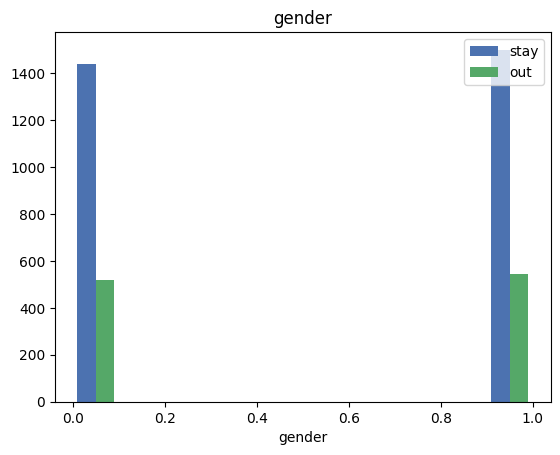

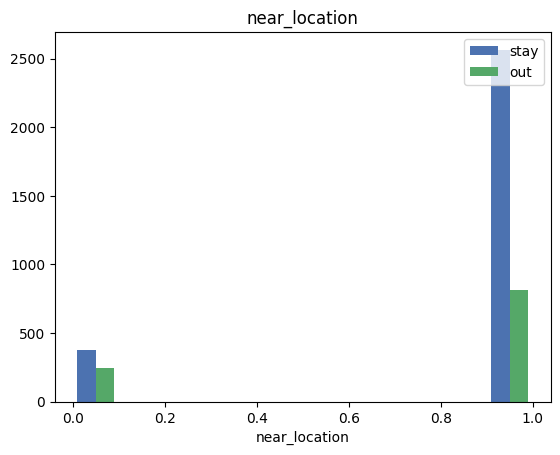

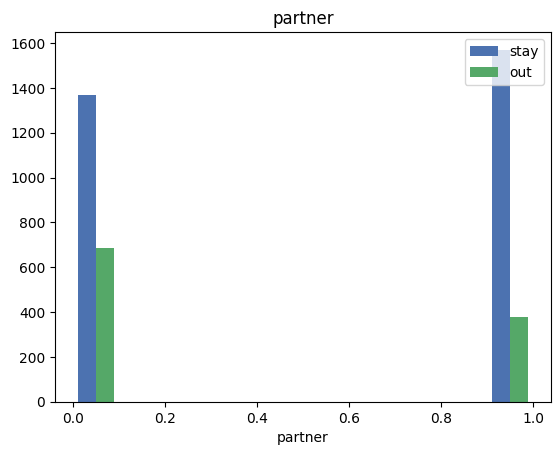

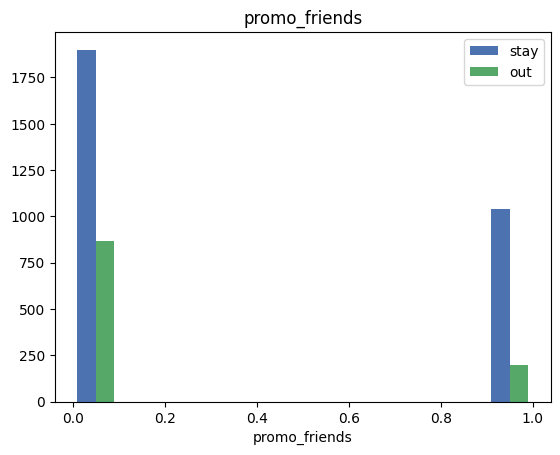

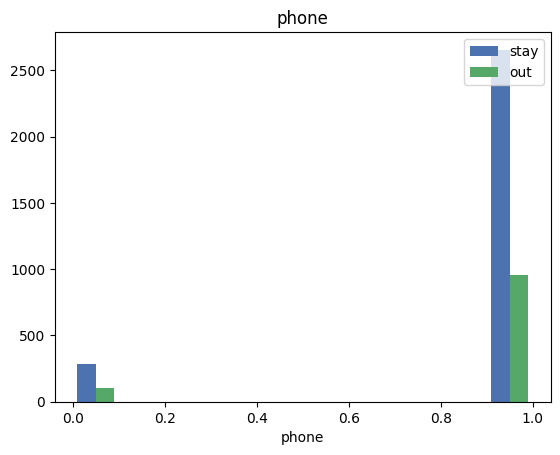

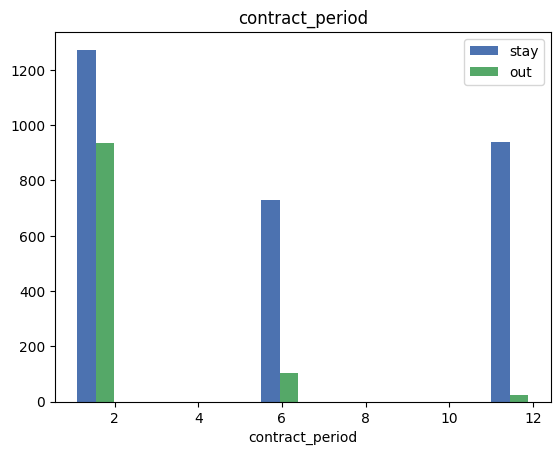

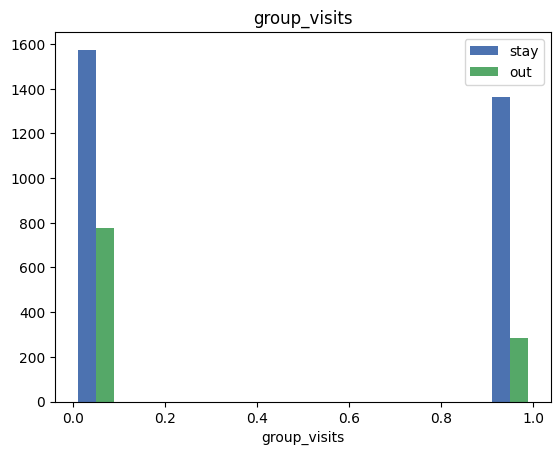

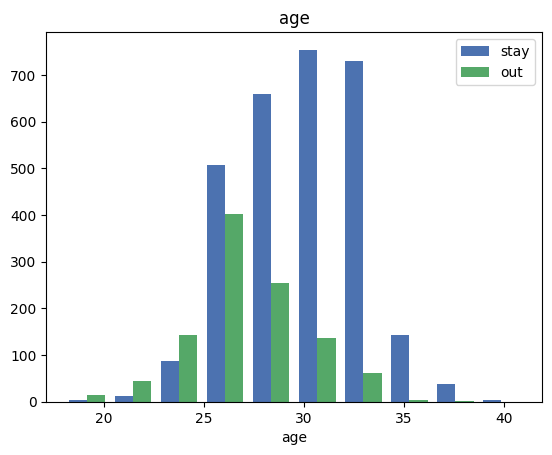

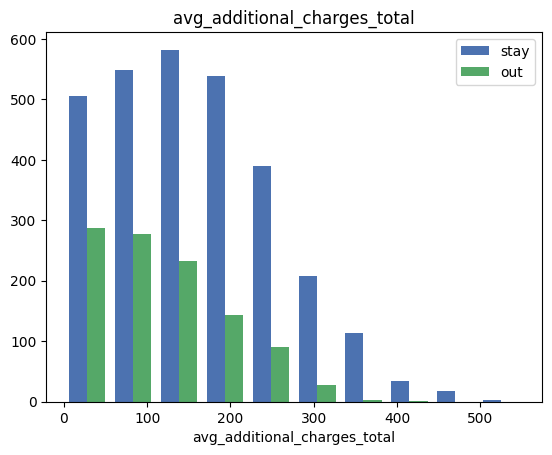

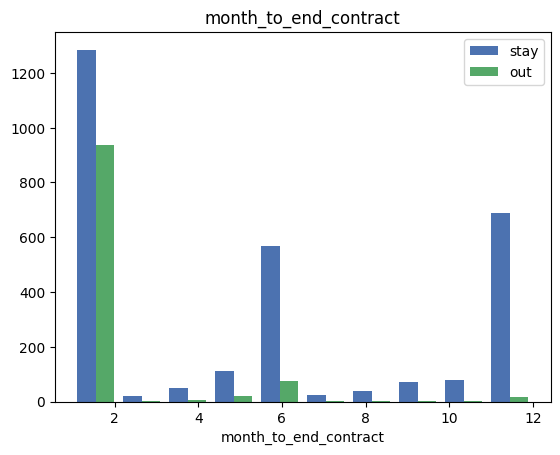

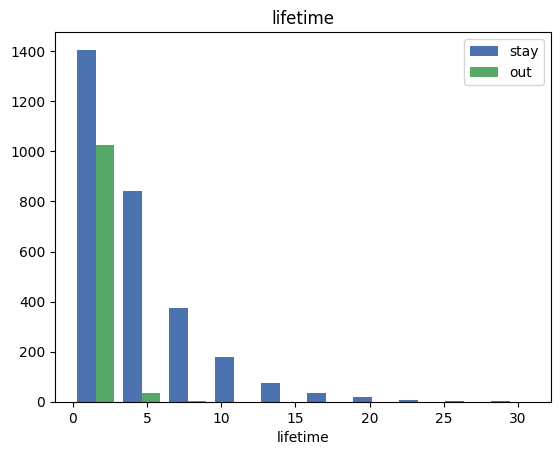

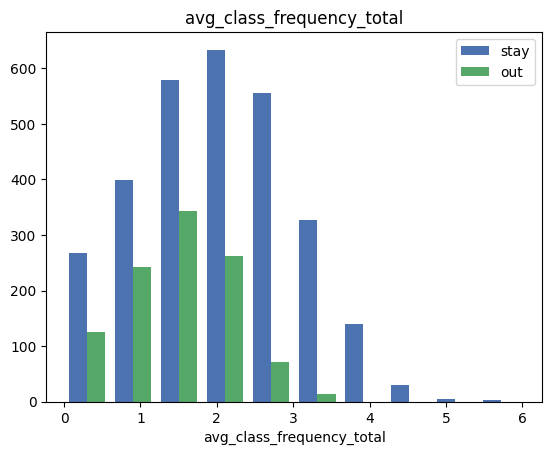

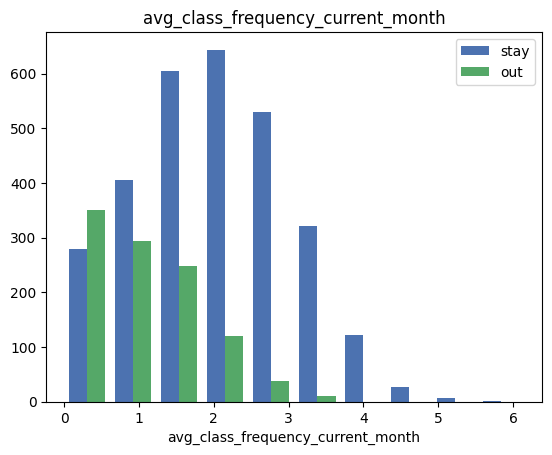

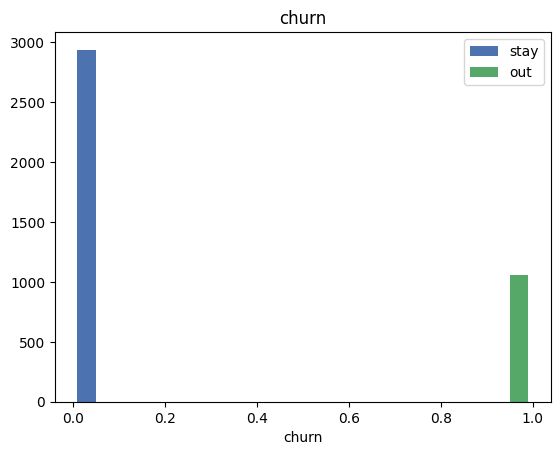

In [8]:
#построение гистограмм с распределением на ушедших и оставшихся

plt.style.use('seaborn-deep')
for elem in df.columns:
    plt.hist([stay[elem], out[elem]], label=['stay', 'out'])
    plt.legend(loc='upper right')
    plt.xlabel(elem)
    plt.title(elem)
    plt.show()

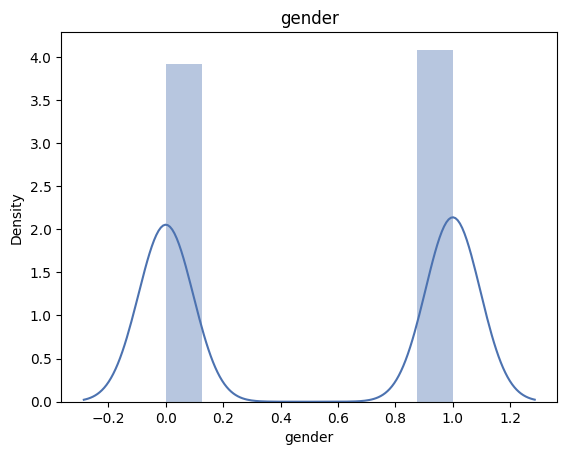

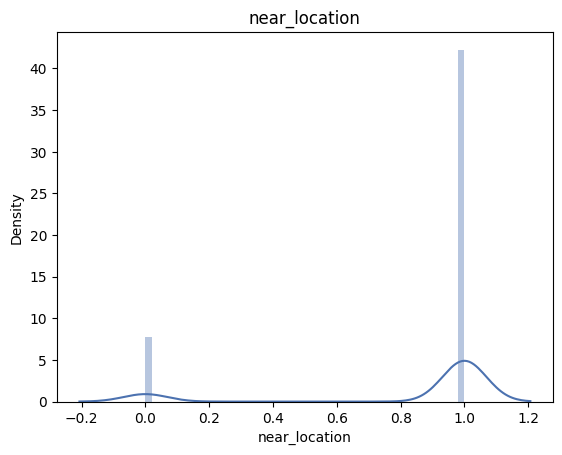

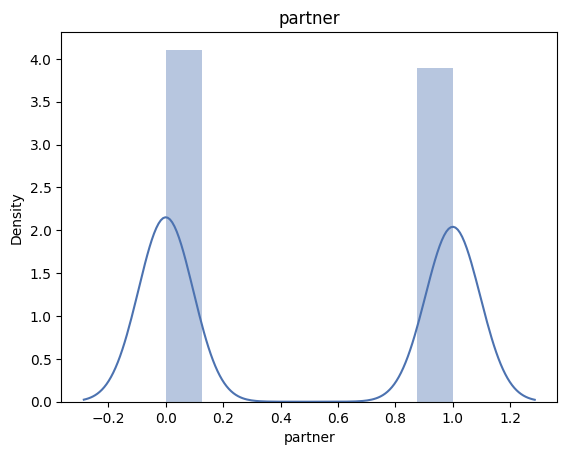

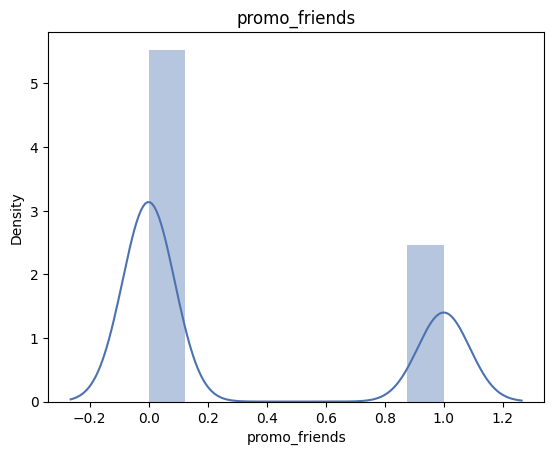

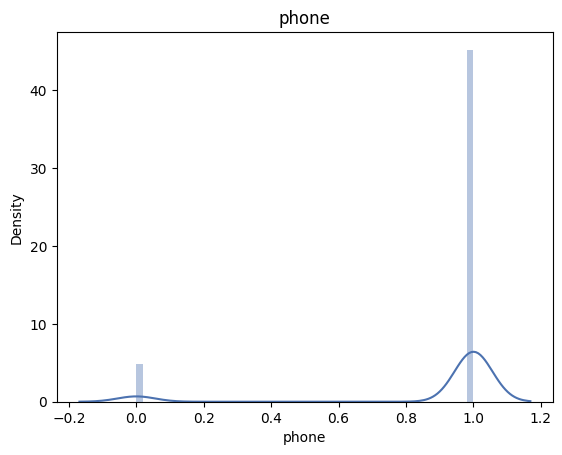

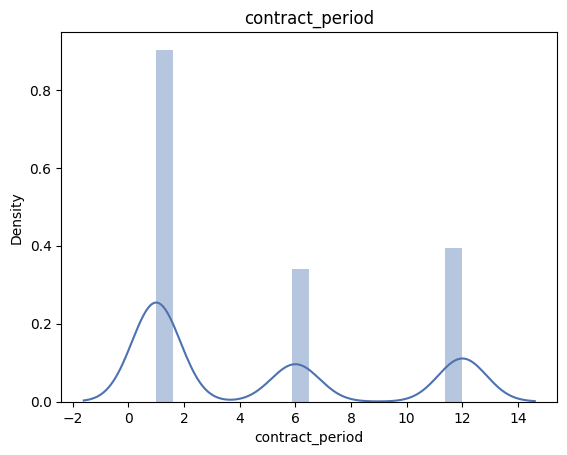

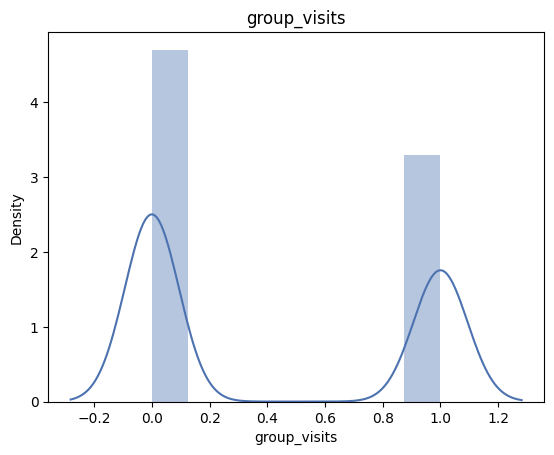

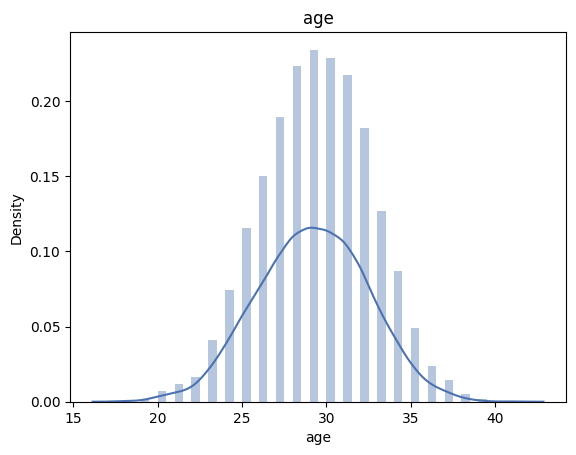

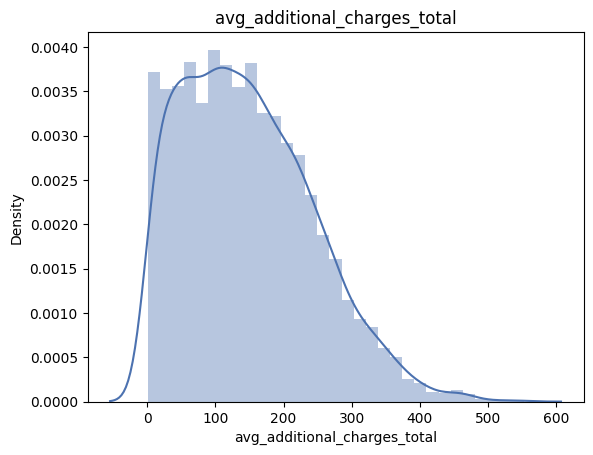

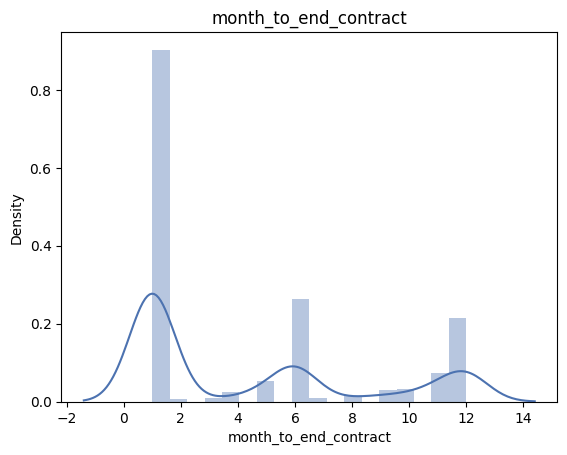

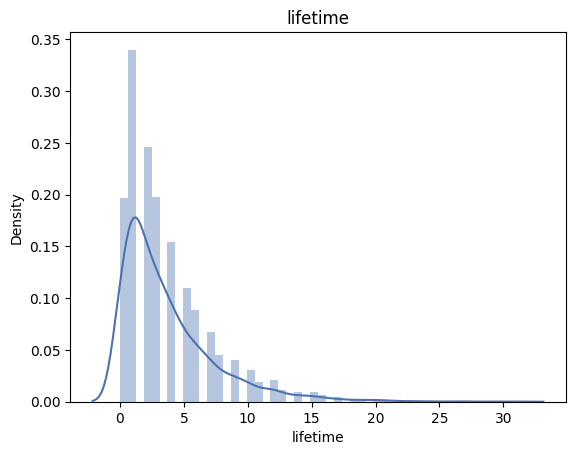

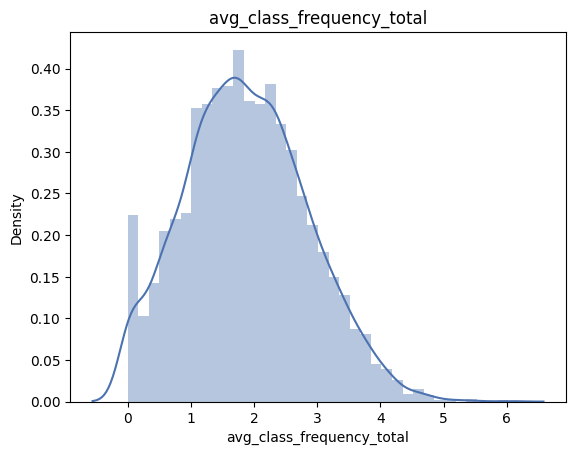

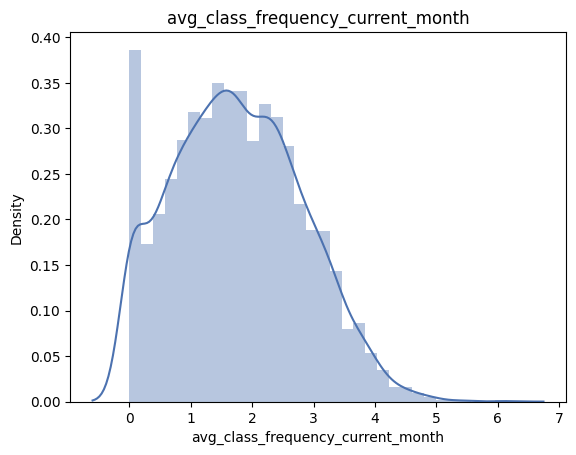

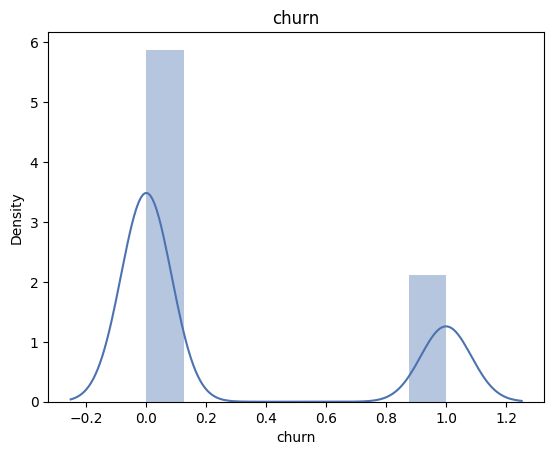

In [9]:
#построение графиков распределения

plt.style.use('seaborn-deep')
for elem in df.columns:
    sns.distplot(df[elem])
    plt.xlabel(elem)
    plt.title(elem)
    plt.show()

Из гистограмм выше можно сделать вывод, что есть данные, распределенные нормально и биноминальные. Что в нашем случае, нормально. 

In [10]:
#построю матрицу корреляций 
cm = df.corr()
cm

gender  near_location  partner  \
gender                                1.0            0.0     -0.0   
near_location                         0.0            1.0     -0.0   
partner                              -0.0           -0.0      1.0   
promo_friends                        -0.0            0.2      0.5   
phone                                -0.0           -0.0      0.0   
contract_period                       0.0            0.2      0.3   
group_visits                          0.0            0.2      0.0   
age                                   0.0            0.1      0.0   
avg_additional_charges_total         -0.0            0.0      0.0   
month_to_end_contract                -0.0            0.1      0.3   
lifetime                              0.0            0.1      0.1   
avg_class_frequency_total             0.0            0.0      0.0   
avg_class_frequency_current_month     0.0            0.1      0.0   
churn                                 0.0           -0.1     -0.2   

                                   promo_friends  phone  contract_period  \
gender                                      -0.0   -0.0              0.0   
near_location                                0.2   -0.0              0.2   
partner                                      0.5    0.0              0.3   
promo_friends                                1.0    0.0              0.2   
phone                                        0.0    1.0             -0.0   
contract_period                              0.2   -0.0              1.0   
group_visits                                 0.1   -0.0              0.2   
age                                          0.1   -0.0              0.1   
avg_additional_charges_total                 0.0    0.0              0.1   
month_to_end_contract                        0.2   -0.0              1.0   
lifetime                                     0.1   -0.0              0.2   
avg_class_frequency_total                    0.0    0.0              0.1   
avg_class_frequency_current_month            0.1    0.0              0.2   
churn                                       -0.2   -0.0             -0.4   

                                   group_visits  age  \
gender                                      0.0  0.0   
near_location                               0.2  0.1   
partner                                     0.0  0.0   
promo_friends                               0.1  0.1   
phone                                      -0.0 -0.0   
contract_period                             0.2  0.1   
group_visits                                1.0  0.1   
age                                         0.1  1.0   
avg_additional_charges_total                0.0  0.1   
month_to_end_contract                       0.2  0.1   
lifetime                                    0.1  0.2   
avg_class_frequency_total                   0.1  0.1   
avg_class_frequency_current_month           0.1  0.2   
churn                                      -0.2 -0.4   

                                   avg_additional_charges_total  \
gender                                                     -0.0   
near_location                                               0.0   
partner                                                     0.0   
promo_friends                                               0.0   
phone                                                       0.0   
contract_period                                             0.1   
group_visits                                                0.0   
age                                                         0.1   
avg_additional_charges_total                                1.0   
month_to_end_contract                                       0.1   
lifetime                                                    0.1   
avg_class_frequency_total                                   0.0   
avg_class_frequency_current_month                           0.1   
churn                                                      -0.2   

           

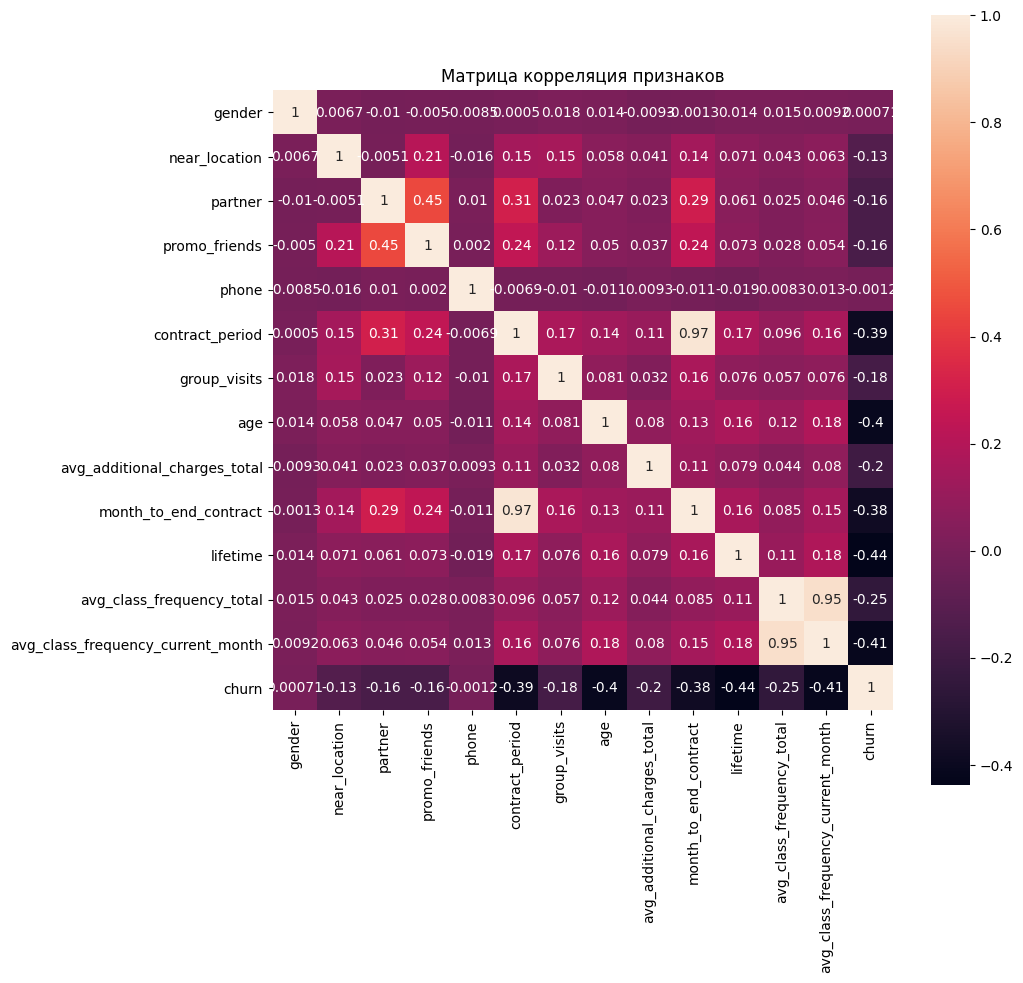

In [11]:
#по матрице корреляций построю тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляция признаков')
plt.show()

Наиболее сильно коррелируют с целевым признаком: период контракта, возраст, количество месяцев до конца контракта, время с момента первого обращения в фитнес-центр, количество посещений в месяц.

Признаки: пол, наличие телефона -  не влияют на целевой признак. 

На основании матрицы корреляций можно сделать вывод о наличии сильно коррелирующих признаков. Это- contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total. Для устранения мультиколлинеарности, удалю вручную по одному из пары признаков. Из первой пары на удаление признак выбрала из логических соображений, из второй - по наименьшему коэффициенту корреляции с целевым признаком.

In [12]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis = 1)
df.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  lifetime  \
0             1   29                          14.2         3   
1             1   31                         113.2         7   
2             0   28                         129.4         2   
3             1   33                          62.7         2   
4             0   26                         198.4         3   

   avg_class_frequency_current_month  churn  
0                                0.0      0  
1                                1.9      0  
2                                1.7      0  
3                                3.4      0  
4                                1.1      0

### Вывод

Данные распределены нормально и биноминально, присуствуют мультиколлинеарные признаки (произведено удаление). Есть признаки, вообще не влияющие на целевой.

Для ушедших клиентов характерен небольшой средний период контракта - 1,7 месяцев, реже посещают групповые занятия и приходят по программе друзей, средний возраст 27 лет, средние траты 115 у.е., примерно 2 месяца до окончания контракта, лайфтаим 1 месяц (чаще всего уходят в самом начале), средняя частота посещений в неделю за предыдущий месяц 1 раз. 

Наиболее сильно коррелируют с целевым признаком: период контракта, возраст, количество месяцев до конца контракта, время с момента первого обращения в фитнес-центр, количество посещений в месяц.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации. Целевой признак - факт оттока клиента в следующем месяце.

Разобью данные на обучающую и валидационную выборку.

In [13]:
# разделю данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

In [14]:
# разделяю модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучу модель на train-выборке двумя способами: логистической регрессией и случайным лесом. 

Оценю метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

### Логистическая регрессия

In [15]:
# стандартизирую данные 
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# применю стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [16]:
# алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear')

# обучение модели
lr_model.fit(X_train_st,  y_train)

# делаем прогнозы
predictions = lr_model.predict(X_test_st) 
probabilities = lr_model.predict_proba(X_test_st)[:,1] 

In [17]:
print('Для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Для логистической регрессии
Accuracy: 0.90
Precision: 0.79
Recall: 0.82
F1: 0.81


### Случайный лес

In [18]:
# алгоритм для модели случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучение модели
rf_model.fit(X_train_st,  y_train)

# делаем прогнозы
predictions = rf_model.predict(X_test_st) 
probabilities = rf_model.predict_proba(X_test_st)[:,1] 

In [19]:
print('Для случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Для случайного леса
Accuracy: 0.90
Precision: 0.81
Recall: 0.75
F1: 0.78


### Вывод

В целом, обе модели показали себя довольно хорошо. На основании метрик считаю, что модель логистической регрессии показала себя лучше, так как у нее выше метрика Recall и сводная метрика F1. В данному случае важнее метрика Recall, так как она показывает, сколько реальных объектов целевого класса мы смогли обнаружить с помощью модели. 

##  Кластеризация клиентов

### Построение дентаграммы

In [20]:
# стандартизируем данные

sc = StandardScaler()
x_sc = sc.fit_transform(X)
linked = linkage(x_sc, method = 'ward')

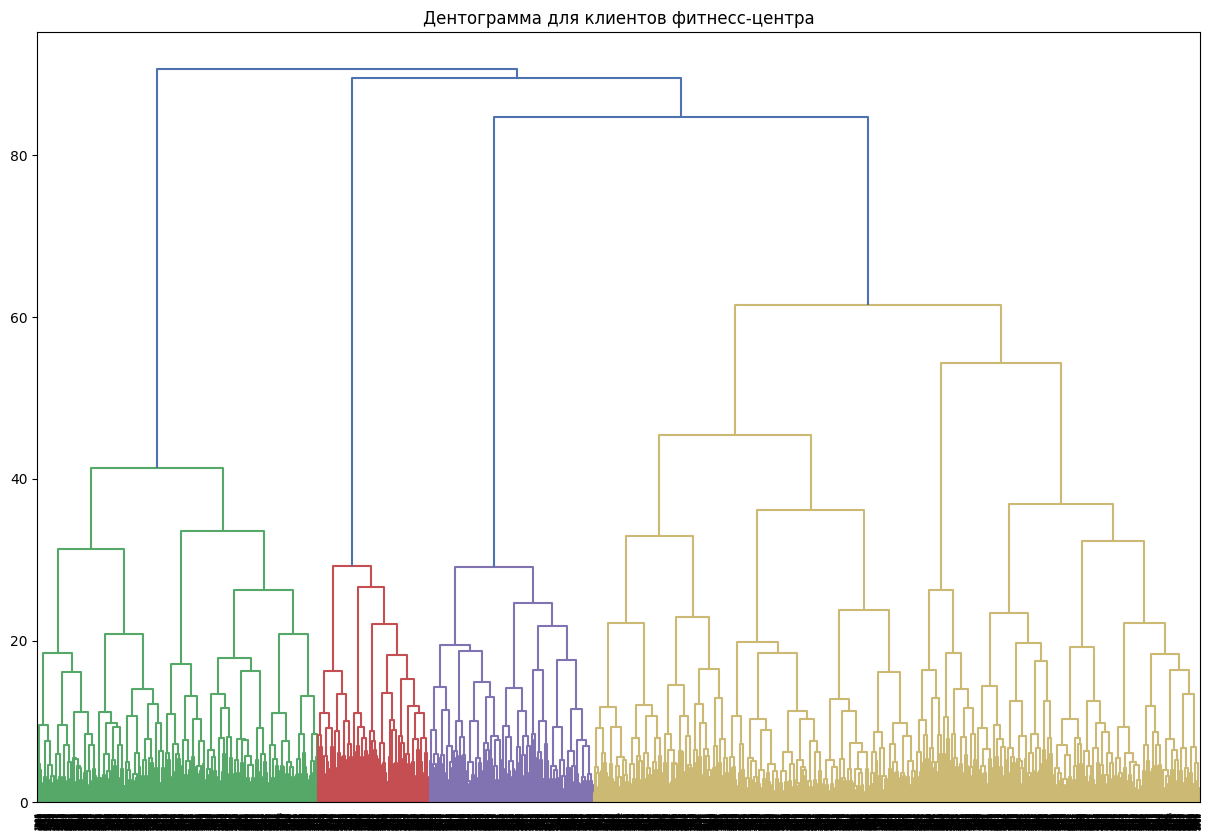

In [21]:
# отрисовка дентограммы

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дентограмма для клиентов фитнесс-центра')
plt.show() 

На основании дентограммы можно выделить 4-5 кластеров.

### Прогнозирование  и изучение кластеров

In [22]:
# задаю модель k_means

km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры
labels = km.fit_predict(x_sc)

# сохраню метки кластера в поле датасета
df['cluster_km'] = labels

In [23]:
# посчитаем численность кластеров
df_group = df.groupby(['cluster_km']).agg({'gender' : 'count'}).sort_values(by = 'gender', ascending = False)
df_group = df_group.rename(columns={'gender':'count'})
df_group

count
cluster_km       
2            1064
3            1007
0             985
1             558
4             386

Больше всего клиентов во 2 и 3 кластерах, меньше всего в 4. 

In [24]:
# посмотрим на средние значения признаков для кластеров

clusters = df.groupby(['cluster_km']).mean()
clusters_T = clusters.T
display(clusters_T)

cluster_km                            0     1     2     3     4
gender                              0.5   0.5   0.5   0.5   0.5
near_location                       1.0   0.0   1.0   1.0   0.9
partner                             0.9   0.5   0.2   0.4   0.5
promo_friends                       1.0   0.1   0.1   0.0   0.3
phone                               1.0   1.0   1.0   1.0   0.0
contract_period                     6.9   3.0   2.0   6.2   4.8
group_visits                        0.5   0.2   0.3   0.5   0.4
age                                29.6  28.7  27.6  30.7  29.3
avg_additional_charges_total      153.4 137.1 119.3 176.3 144.2
lifetime                            4.3   3.0   1.9   5.4   3.9
avg_class_frequency_current_month   1.9   1.6   1.2   2.3   1.7
churn                               0.1   0.4   0.6   0.0   0.3

In [25]:
# построю столбчатые диаграммы распределения признаков

for column in clusters.columns:
    
    fig = px.bar(clusters, x = clusters.index , y = column, width=500, height=400, labels={"cluster_km": " Номер кластера"}, 
                 title= f'Распредеелние признака  {column}' )
    
    fig.update_xaxes(tickangle = 30)
    fig.show()

Можно сказать, что:

0 кластер характерен тем, что большинство из него пришли по партнерской программе и все записались по программе "приведи друга", самый большой средний период контракта.

Кластер 1 характерен тем, что клиенты проживают не в районе фитнесс-центра, небольшой (3 месяца) период контракта, второй по величине отток. 

Во 2-м кластере клиенты имеют самый небольшой средний период контракта и самый молодой возраст, самый маленький лайфтайм, реже всего посещали клуб последний месяц. Самый большой отток. 

3 кластер самый взрослый из всех, средний возраст 30,7 лет, имеет самые большие траты и самый большой лайфтайм и 2 по величине период контракта, больше всех посещают клуб. Уходят меньше всего.

4 кластер вообще не указал телефон.

In [26]:
# посмотрим отдельно на долю оттока 
#средние значения оттока в кластерах
clusters.groupby(clusters.index).agg({'churn':'mean'}).sort_values(by='churn', ascending = False)

churn
cluster_km       
2             0.6
1             0.4
4             0.3
0             0.1
3             0.0

In [27]:
# посмотрим процент оттока ко всем ушедшим клиентам
df_group['out_count'] = df.groupby(['cluster_km']).agg({'churn' : 'sum'})
df_group['out_%'] = (df_group['out_count'] / df_group['out_count'].sum()) * 100
df_group.sort_values(by ='out_%', ascending = False)

count  out_count  out_%
cluster_km                         
2            1064        600   56.6
1             558        225   21.2
0             985        118   11.1
4             386        103    9.7
3            1007         15    1.4

Подтверждается, что самая большая доля оттока у 2 кластера, далее идет 1 и 4. Самые устойчивые кластеры - 3 и 0. Из 3 кластера клиенты не уходили вообще. 

По проценту оттока ко всем ушедшим клиентам лидируют также 2 и 1 кластеры, далее 0 и 4 с небольшой разницей. И наименьший отток также в 3 кластере. 

### Вывод 

Произведена кластеризация клиентов на 5 групп. 

Больше всего клиенты уходят из 2 кластера, который имеет следующие характеристики : клиенты имеют самый небольшой средний период контракта и самый молодой возраст, самый маленький лайфтайм, реже всего посещали клуб последний месяц.

Самый усточивый кластер - 3. Характеризуется самым большим возрастом - 30,7 лет, имеет самые большие траты, лайфтайм и 2 по величине период контракта, больше всех посещают клуб. 

Также хорошую устойчивость показал 0 кластер. 

## Вывод

Произведена кластеризация пользователей на 5 групп. 

Самые утойчивые клиенты проживают в районе клуба, приходят по партнерским программам и по программе "приведи друга", имеют средний период контракта 7-6 месяцев, половина из них посещают групповые тренировки, возраст около 30 лет, больше остальных тратят в клубе на услуги, посещают клуб около 2 раз в неделю. Осносятся к 0 и 3 кластерам. 

Ушедшие клиенты реже пользовались партнерскими программами и акциями, имеют небольшой (около 2-3 месяцев) период контракта, средний возраст 28 лет, мало посещают групповые тренировки, лайфтайм 2-3 месяца, посещают зал примерно 1 раз в неделю. Если клиент живет не в районе клуба или не указывает телефон, это также повышает шансы на уход. Относятся к классам 1, 2, 4.

Для прогнозирования оттока клиентов следует использовать модель логистической регрессии, так как она показала себя лучше всего. 

Исходя из "портрета" ушедшего клиента, можно предположить, что уходят обычно люди, которые только начинают посещать клуб. Следует уделять внимание новичкам в течении 3-4 первых месяцев. 

Опросы удовлетворенности клиентов помогут выяснить, чем точно недовольны люди. 

Также, устойчивые клиенты чаще посещают групповые занятия. Стоит провести среди новичков небольшую рекламную компанию групповых программ, стимулировать на посещение.  

Если клиент берет небольшой контракт, он скорее уйдет, если ему не понравится. Отделу продаж следует продвигать долгосрочные контракты.

Также стоит уделить внимание привлечению устойчивых клиентов. На основании портрета целевого клиента, необходимо настроить рекламу. Можно предлагать скидки или бонусы за долгосрочные контракты. 